#### Import and pre-process the data, train the VAE

**Import libraries used and mount a google drive**

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as imread
import numpy as np
import random
import os
import time
from IPython.display import clear_output
from sklearn.utils import shuffle
import pandas as pd
import scipy.stats as scp
from sklearn.metrics import roc_curve, auc

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Unzip the zip files with the data from the google drive**

In [2]:
start_time = time.time()

!unzip '/content/drive/My Drive/SPACE_DATA/DS2_train_typical.zip'
!unzip '/content/drive/My Drive/SPACE_DATA/DS2_validation_typical.zip'
!unzip '/content/drive/My Drive/SPACE_DATA/DS2_test_typical.zip'
!unzip '/content/drive/My Drive/SPACE_DATA/DS2_test_novel.zip'

clear_output()
print('UNZIPPING TIME = {}\n'.format(time.time()-start_time))

UNZIPPING TIME = 41.74374532699585



**Create lists with all path files to the images**

novel_path = list with all path files to the novel images

typical_path = list with all the path files to the typical images

"class name"_path = list will the path files of a certain class

In [0]:
typical_train_path = []
for path in os.listdir('/content/train_typical'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/train_typical', path)
      typical_train_path.append(full_path)

typical_validation_path = []
for path in os.listdir('/content/validation_typical'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/validation_typical', path)
      typical_validation_path.append(full_path)

typical_test_path = []
for path in os.listdir('/content/test_typical'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_typical', path)
      typical_test_path.append(full_path)

novel_all_path = []
for path in os.listdir('/content/test_novel/all'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/all', path)
      novel_all_path.append(full_path)

novel_bedrock_path = []
for path in os.listdir('/content/test_novel/bedrock'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/bedrock', path)
      novel_bedrock_path.append(full_path)

novel_brokenrock_path = []
for path in os.listdir('/content/test_novel/broken-rock'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/broken-rock', path)
      novel_brokenrock_path.append(full_path)

novel_drillhole_path = []
for path in os.listdir('/content/test_novel/drill-hole'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/drill-hole', path)
      novel_drillhole_path.append(full_path)

novel_drt_path = []
for path in os.listdir('/content/test_novel/drt'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/drt', path)
      novel_drt_path.append(full_path)

novel_dumppile_path = []
for path in os.listdir('/content/test_novel/dump-pile'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/dump-pile', path)
      novel_dumppile_path.append(full_path)

novel_edgecases_path = []
for path in os.listdir('/content/test_novel/edge_cases'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/edge_cases', path)
      novel_edgecases_path.append(full_path)

novel_float_path = []
for path in os.listdir('/content/test_novel/float'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/float', path)
      novel_float_path.append(full_path)

novel_meteorite_path = []
for path in os.listdir('/content/test_novel/meteorite'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/meteorite', path)
      novel_meteorite_path.append(full_path)

novel_other_path = []
for path in os.listdir('/content/test_novel/other'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/other', path)
      novel_other_path.append(full_path)

novel_scuff_path = []
for path in os.listdir('/content/test_novel/scuff'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/scuff', path)
      novel_scuff_path.append(full_path)

novel_veins_path = []
for path in os.listdir('/content/test_novel/veins'):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/veins', path)
      novel_veins_path.append(full_path)



**Convert the images' pixel values into float32**

All the values are savedd in float64, converting to float32 saves a lot of memory

The values are integers from 0 to 255, so converting to float32 doesn't looses any information

In [4]:
start_time = time.time()

for i in range (len(typical_train_path)):
  path = typical_train_path[i]
  image = np.load(path).astype('float32')
  np.save(path, image)

for i in range (len(typical_validation_path)):
  path = typical_validation_path[i]
  image = np.load(path).astype('float32')
  np.save(path, image)

for i in range (len(typical_test_path)):
  path = typical_test_path[i]
  image = np.load(path).astype('float32')
  np.save(path, image)

for i in range (len(novel_all_path)):
  path = novel_all_path[i]
  image = np.load(path).astype('float32')
  np.save(path, image)

print('CONVERTING TIME = {}\n'.format(time.time()-start_time))

CONVERTING TIME = 27.812819004058838



**Function to check classes of images path names**

A few imags belong to multiple classes (only 5). Classes range from 0 to 10

In [0]:
def check_classes(path_to_check):
    classes_dict = dict([(1,novel_bedrock_path),(2,novel_brokenrock_path),(3,novel_drillhole_path),(4,novel_drt_path),
                     (5,novel_dumppile_path),(6,novel_edgecases_path),(7,novel_float_path),(8,novel_meteorite_path),
                     (9,novel_other_path),(10,novel_scuff_path),(11,novel_veins_path)])

    counts = np.zeros((len(path_to_check), 11))
    for j,path1 in enumerate(path_to_check):
        for i in range(1,12):
            for path2 in classes_dict[i]:
                if path1.split('/')[-1] == path2.split('/')[-1]:
                    counts[j][i-1] += 1

    classes = []
    for i in range(len(path_to_check)):
        classes.append(list(np.where(counts[i]==1)[0]))
    return classes

check_classes(novel_drillhole_path)

**Function to load images**

Takes an image path and returns its image array

In [0]:
def load_images(image_paths):
  images = []
  if np.shape(image_paths) == ():
    images.append(np.load(image_paths))
  else:
    for path in image_paths:
      img = np.load(path)
      images.append(img)
  return np.array(images)

**Function to plot an image**

Takes an image array and plots its 6 channels

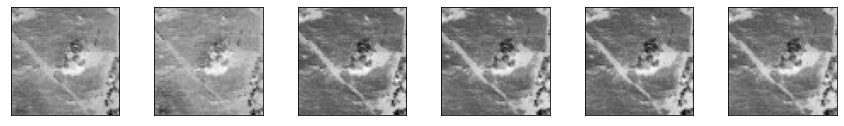

In [21]:
def plot_image(image):
    plot = plt.figure(figsize=[15,2])
    for i in range(6):
        plt.subplot(1, 6, i+1)
        plt.xticks([]); plt.yticks([])
        plt.imshow(image[0,:,:,i], cmap=plt.cm.binary)
    plt.show()

plot_image(load_images(typical_validation_path[0]))

**Class of the Variational Autoencoder Models (two different models given, choose one)**

encode = takes an image and returns the mean and the log(variance) of its latent vector 

reparameterize = takes the mean and log(variance) of a latent vector and samples a vector from them

decode = takes a latent vector and returns the logits of the output (these will have to be passed through a sigmoid function to obtain the reconstruction of x)

In [0]:
class CVAE(tf.keras.Model):
    def __init__(self, z_size):
        super(CVAE, self).__init__()
        self.z_size = z_size
        self.encoder_nn = tf.keras.models.Sequential([
                          tf.keras.layers.Input((64, 64, 6)),                          
                          tf.keras.layers.Conv2D(12, (7,7), strides = (1,1), padding = 'SAME', activation='relu'),
                          tf.keras.layers.Conv2D(8, (5,5), strides = (2,2), padding = 'SAME', activation='relu'),
                          tf.keras.layers.Conv2D(6, (3,3), strides = (2,2), padding = 'SAME', activation='relu'),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(z_size*2)
                          ], name='Encoder')

        self.decoder_nn = tf.keras.models.Sequential([
                          tf.keras.layers.Dense(768, activation='relu', input_shape=(z_size,)),
                          tf.keras.layers.Reshape(target_shape=(16, 16, 3)),
                          tf.keras.layers.Conv2DTranspose(8, (3,3), strides = (2,2), padding = 'SAME', activation='relu'),
                          tf.keras.layers.Conv2DTranspose(12, (5,5), strides = (2,2), padding = 'SAME'),
                          tf.keras.layers.Conv2DTranspose(6, (7,7), strides = (1,1), padding = 'SAME'),
                          ], name='Decoder')

    def encode(self, x):
        encoder_nn_output = self.encoder_nn(x)
        z_mean, z_logvar = tf.split(encoder_nn_output, num_or_size_splits=2, axis=1)
        return z_mean, z_logvar

    def reparameterize(self, z_mean, z_logvar):
        epsilon = tf.random.normal(shape=z_mean.shape)
        z_sampled = epsilon * tf.exp(z_logvar * 0.5) + z_mean
        return z_sampled
      
    def decode(self, z):
        pixel_output = self.decoder_nn(z)
        return pixel_output

#model = CVAE(768)
#model.encoder_nn.summary()
#model.decoder_nn.summary()

In [0]:
class CVAE(tf.keras.Model):
    def __init__(self, z_size):
        super(CVAE, self).__init__()
        self.z_size = z_size
        self.encoder_nn = tf.keras.models.Sequential([
                          tf.keras.layers.Input((64, 64, 6)),                          
                          tf.keras.layers.Conv2D(32, (7,7), strides = (1,1), padding = 'SAME'),
                          tf.keras.layers.BatchNormalization(),
                          tf.keras.layers.LeakyReLU(),
                          tf.keras.layers.Dropout(0.25),
                          tf.keras.layers.Conv2D(128, (5,5), strides = (1,1), padding = 'SAME'),
                          tf.keras.layers.MaxPool2D((2,2), padding = 'SAME'),
                          tf.keras.layers.BatchNormalization(),
                          tf.keras.layers.LeakyReLU(),
                          tf.keras.layers.Dropout(0.25),
                          tf.keras.layers.Conv2D(64, (3,3), strides = (1,1), padding = 'SAME'),
                          tf.keras.layers.MaxPool2D((2,2), padding = 'SAME'),
                          tf.keras.layers.BatchNormalization(),
                          tf.keras.layers.LeakyReLU(),
                          tf.keras.layers.Dropout(0.25),
                          tf.keras.layers.Conv2D(6, (3,3), strides = (1,1), padding = 'SAME'),
                          tf.keras.layers.BatchNormalization(),
                          tf.keras.layers.LeakyReLU(),
                          tf.keras.layers.Dropout(0.25),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(z_size*2), 
                          tf.keras.layers.LeakyReLU(),
                          tf.keras.layers.Dense(z_size*2)
                          ], name='Encoder')

        self.decoder_nn = tf.keras.models.Sequential([
                          tf.keras.layers.Dense(16*16*6, activation='relu', input_shape=(z_size,)),
                          tf.keras.layers.Dense(16*16*6, activation='relu'),
                          tf.keras.layers.Reshape(target_shape=(16, 16, 6)),
                          tf.keras.layers.Conv2DTranspose(64, (3,3), strides = (1,1), padding = 'SAME'),
                          tf.keras.layers.BatchNormalization(),
                          tf.keras.layers.LeakyReLU(),
                          tf.keras.layers.Dropout(0.25),
                          tf.keras.layers.Conv2DTranspose(128, (5,5), strides = (2,2), padding = 'SAME'),
                          tf.keras.layers.BatchNormalization(),
                          tf.keras.layers.LeakyReLU(),
                          tf.keras.layers.Dropout(0.25),
                          tf.keras.layers.Conv2DTranspose(64, (7,7), strides = (2,2), padding = 'SAME'),
                          tf.keras.layers.BatchNormalization(),
                          tf.keras.layers.LeakyReLU(),
                          tf.keras.layers.Dropout(0.25),
                          tf.keras.layers.Conv2DTranspose(6, (7,7), strides = (1,1), padding = 'SAME'),
                          ], name='Decoder')

    def encode(self, x):
        encoder_nn_output = self.encoder_nn(x)
        z_mean, z_logvar = tf.split(encoder_nn_output, num_or_size_splits=2, axis=1)
        return z_mean, z_logvar

    def reparameterize(self, z_mean, z_logvar):
        epsilon = tf.random.normal(shape=z_mean.shape)
        z_sampled = epsilon * tf.exp(z_logvar * 0.5) + z_mean
        return z_sampled
      
    def decode(self, z):
        pixel_output = self.decoder_nn(z)
        return pixel_output

#model = CVAE(768)
#model.encoder_nn.summary()
#model.decoder_nn.summary()

**Function to compute the ELBO loss**

Takes an image and returns the ELBO loss. The term variance is a hyperparameter and can be changed

In [0]:
def calculate_ELBO(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  pixel_prob = tf.math.sigmoid(x_logit)

  variance = 0.2**2
  logpx_z = tf.reduce_sum(-.5 * (((x - pixel_prob) ** 2. / variance) + tf.math.log(variance * 2.0 * np.pi)), axis=[1, 2, 3])
  KL = -0.5*(tf.reduce_sum(tf.math.add(logvar,1), axis=1) - tf.reduce_sum(tf.exp(logvar), axis=1) - tf.reduce_sum(tf.exp(mean ** 2), axis=1))

  return -tf.reduce_mean(logpx_z - KL)

**Define optimizer and loss metrics**

The learnign rate of the Adam optimizer is a hyperparameter

In [0]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

**Define a function for a training a batch**

In [0]:
def train_step(model, x, optimizer):
    with tf.GradientTape() as tape:
        loss = calculate_ELBO(model, x)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        #train_loss(loss)
    return loss

**Split data into train ans test data**

A certain percentage of the images from each class is selected as novel. The ratio term defines how many test images to pick from each class (1 every 2; 1 every 3...)

In [0]:
novel_train_path = []
novel_test_path = []
ratio = 2

for i, path in enumerate(os.listdir('/content/test_novel/bedrock')):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/bedrock', path)
      if i%ratio: novel_train_path.append(full_path)
      if not i%ratio: novel_test_path.append(full_path)

for i, path in enumerate(os.listdir('/content/test_novel/broken-rock')):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/broken-rock', path)
      if i%ratio: novel_train_path.append(full_path)
      if not i%ratio: novel_test_path.append(full_path)

for i, path in enumerate(os.listdir('/content/test_novel/drill-hole')):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/drill-hole', path)
      if i%ratio: novel_train_path.append(full_path)
      if not i%ratio: novel_test_path.append(full_path)

for i, path in enumerate(os.listdir('/content/test_novel/drt')):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/drt', path)
      if i%ratio: novel_train_path.append(full_path)
      if not i%ratio: novel_test_path.append(full_path)

for i, path in enumerate(os.listdir('/content/test_novel/dump-pile')):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/dump-pile', path)
      if i%ratio: novel_train_path.append(full_path)
      if not i%ratio: novel_test_path.append(full_path)

#for i, path in enumerate(os.listdir('/content/test_novel/edge_cases')):
#    if path != '.DS_Store':
#      full_path = os.path.join('/content/test_novel/edge_cases', path)
#      if i%ratio: novel_train_path.append(full_path)
#      if not i%ratio: novel_test_path.append(full_path)

for i, path in enumerate(os.listdir('/content/test_novel/float')):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/float', path)
      if i%ratio: novel_train_path.append(full_path)
      if not i%ratio: novel_test_path.append(full_path)

for i, path in enumerate(os.listdir('/content/test_novel/meteorite')):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/meteorite', path)
      if i%ratio: novel_train_path.append(full_path)
      if not i%ratio: novel_test_path.append(full_path)

#for i, path in enumerate(os.listdir('/content/test_novel/other')):
#    if path != '.DS_Store':
#      full_path = os.path.join('/content/test_novel/other', path)
#      if not i%ratio: novel_train_path.append(full_path)
#      if i%ratio: novel_test_path.append(full_path)

#for i, path in enumerate(os.listdir('/content/test_novel/scuff')):
#    if path != '.DS_Store':
#      full_path = os.path.join('/content/test_novel/scuff', path)
#      if i%ratio: novel_train_path.append(full_path)
#      if not i%ratio: novel_test_path.append(full_path)

for i, path in enumerate(os.listdir('/content/test_novel/veins')):
    if path != '.DS_Store':
      full_path = os.path.join('/content/test_novel/veins', path)
      if i%ratio: novel_train_path.append(full_path)
      if not i%ratio: novel_test_path.append(full_path)

**Check amount of images in each dataset**

In [18]:
print(np.shape(typical_train_path))
print(np.shape(typical_validation_path))
print(np.shape(typical_test_path))
print(np.shape(novel_all_path))
print(np.shape(novel_train_path))
print(np.shape(novel_test_path))

(9302,)
(1386,)
(426,)
(430,)
(216,)
(219,)


**Define some constant terms**


In [0]:
N_typical_images_train = len(typical_train_path)
N_typical_images_validation = len(typical_validation_path)
N_typical_images_test = len(typical_test_path)
N_novel_images_all = len(novel_all_path)
N_novel_images_train = len(novel_train_path)
N_novel_images_test = len(novel_test_path)
img_height = load_images(typical_train_path[0]).shape[1]
img_width = load_images(typical_train_path[0]).shape[2]
img_channels = load_images(typical_train_path[0]).shape[3]
input_range = 255

**Function to create a dataset from images**

setup_dataset shuffles the images

setup_dataset_no_shuffle doesn't shuffle the images

In [0]:
def setup_dataset(x):
  images = x/input_range

  batch_size = 100
  dataset = tf.data.Dataset.from_tensor_slices((images)).shuffle(len(images)).batch(batch_size)
  return dataset

def setup_dataset_no_shuffle(x):
  images = x/input_range

  batch_size = 100
  dataset = tf.data.Dataset.from_tensor_slices((images)).batch(batch_size)
  return dataset

**Load model weights (if model was already trained)**

Load the weights of the model from the google drive if they were saved after training

In [26]:
z_size = 768
model = CVAE(z_size)
model.encoder_nn.load_weights('/content/drive/My Drive/SPACE_DATA/DS2_Novelty_VAE_Encoder/')
model.decoder_nn.load_weights('/content/drive/My Drive/SPACE_DATA/DS2_Novelty_VAE_Decoder/')

**Train the VAE**

Plots the loss curve every 20 batches

99.40 ---> -15596.13


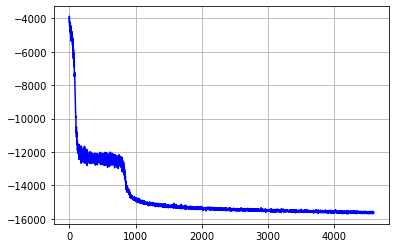

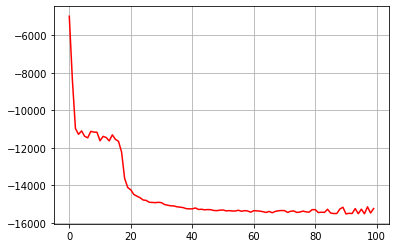

TRAINING TIME = 1160.9138531684875



In [25]:
batch_size = 200
batches_n = (N_typical_images_train//batch_size)
epochs = 100

start_time = time.time()
losses = []
losses_val = []

for j in range(epochs):
  typical_train_path = shuffle(typical_train_path, random_state=0)
  for i in range(batches_n):
    images = load_images(typical_train_path[i*200:(i+1)*200])
    x = (images/255).astype('float32')
    loss = train_step(model, x, optimizer)
    losses = np.append(losses, loss.numpy())

    if i%20 == 0:
      clear_output()
      print(str(j) + '.' + str(i) + ' ---> ' + str(loss.numpy()))
      plt.plot(range(len(losses)), losses, 'b')
      plt.grid(which='both', axis='both')
      plt.show()
    
  typical_validation_path = shuffle(typical_validation_path, random_state=0)
  images_val = load_images(typical_validation_path[0:500])
  x_val = (images_val/255).astype('float32')
  loss_val = calculate_ELBO(model, x_val)
  losses_val = np.append(losses_val, loss_val.numpy())
  plt.plot(range(len(losses_val)), losses_val, 'r')
  plt.grid(which='both', axis='both')
  plt.show()

print('TRAINING TIME = {}\n'.format(time.time()-start_time))

#save model weights
#model.encoder_nn.save_weights('/content/drive/My Drive/SPACE_DATA/DS2_Novelty_VAE_Encoder/')
#model.decoder_nn.save_weights('/content/drive/My Drive/SPACE_DATA/DS2_Novelty_VAE_Decoder/')

**Function to reconstruct images**

Takes an image path and returns its reconstruction (and its ELBO loss)

Original Pictures:


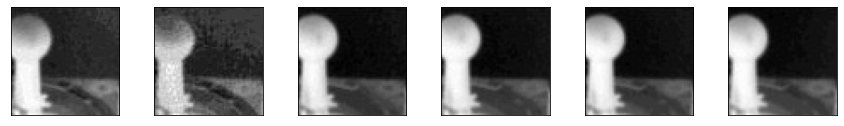

Reconstructed Pictures


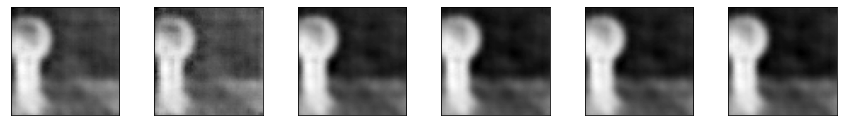

16227.12
Original Pictures:


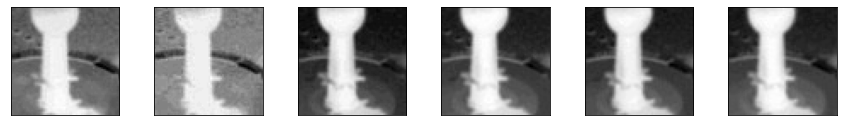

Reconstructed Pictures


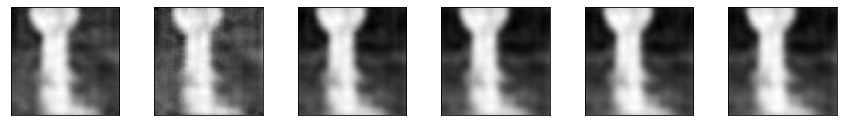

16230.533
Original Pictures:


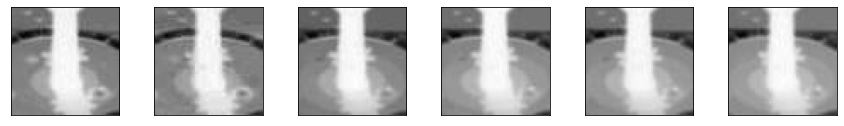

Reconstructed Pictures


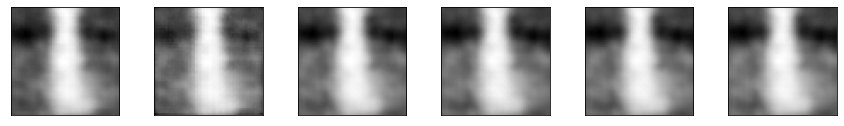

15468.733
Original Pictures:


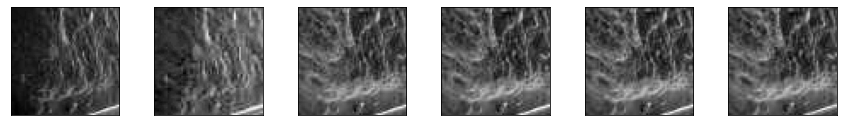

Reconstructed Pictures


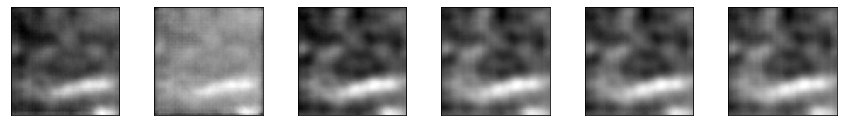

15919.47
Original Pictures:


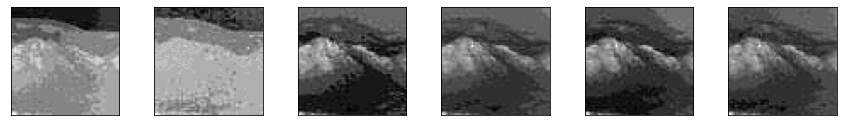

Reconstructed Pictures


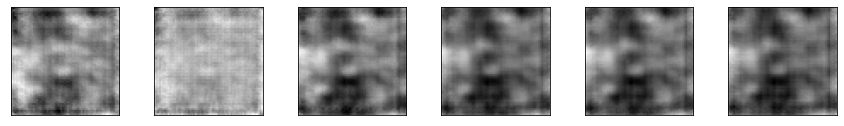

16316.276


In [27]:
def reconstruct_images(image_path):
    images = load_images(image_path)
    x = (images/255).astype('float32')

    z_mean, z_logvar = model.encode(x)
    z = model.reparameterize(z_mean, z_logvar)
    pixel_output = model.decode(z)
    pixel_prob = tf.math.sigmoid(pixel_output)
    
    loss = -calculate_ELBO(model,x)
    loss = loss
    
    print('Original Pictures:')
    plot_image(x)
    print('Reconstructed Pictures')
    plot_image(pixel_prob)
    return loss

for i in range(5):
  loss = reconstruct_images(typical_train_path[i])
  print(loss.numpy())

**Function to visulaize the latent space**

Takes a list of image paths and the 2 dimension of the latent space to plot

3.3572893142700195


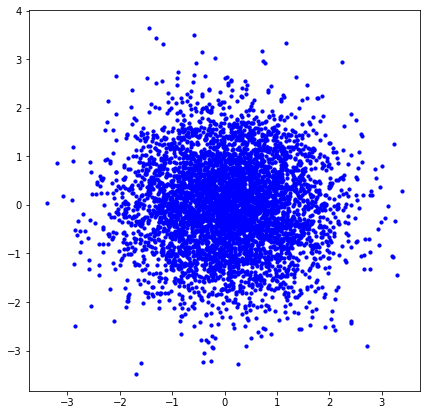

In [28]:
def visualize_latent_space(model, paths, dimensions):
  plot = plt.figure(figsize=[7,7])
  outliers=0
  outlier = []
  latent_space = np.ndarray([0, model.z_size])
  for i in range(len(paths)//100):
      x = load_images(paths[i*100:(i+1)*100])
      x = (x/input_range).astype('float32')
      z_mean, z_logvar = model.encode(x)
      z = model.reparameterize(z_mean, z_logvar)
      latent_space = np.append(latent_space, z, axis=0)


  plt.scatter(latent_space[:, dimensions[0]], latent_space[:,dimensions[1]], color = 'blue', s=10)

  return latent_space, outlier

start_time = time.time()
latent_space, outlier = visualize_latent_space(model, typical_train_path[0:5000], [0,5])
print(time.time()-start_time)

**Compare latent space distribution to normal distribution**

Plots the distribution of various latent space dimensions with a histogram and superimposes a normal distribution for comparison

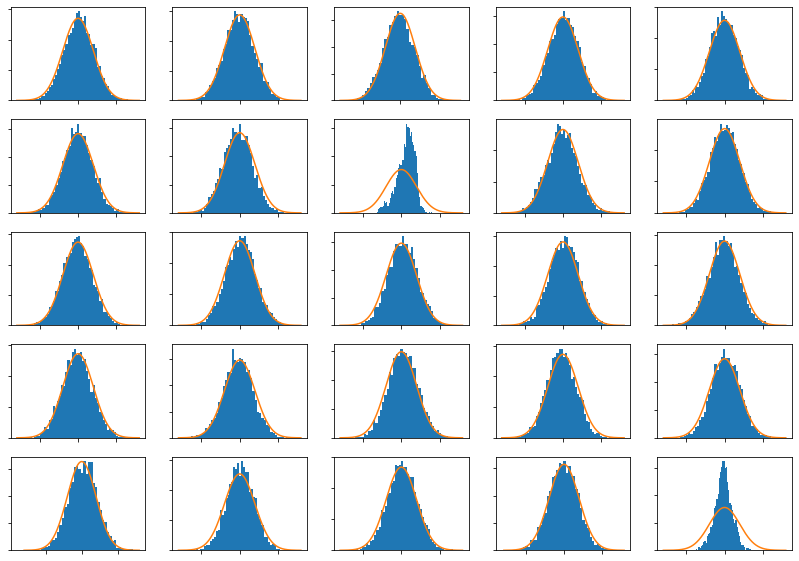

In [29]:
fig, axs = plt.subplots(5,5, figsize=(14, 10))
axs = axs.ravel()

a=0
for i in range(25):
    bins = 50
    scale = ((np.max(latent_space[:,i])-np.min(latent_space[:,i]))/bins)*len(latent_space[:,i])
    x_axis = np.arange(-4, 4, 0.001)
    axs[a].hist(latent_space[:,i], bins)
    y_vals = axs[a].get_yticks()
    axs[a].set_yticklabels([])
    axs[a].set_xticklabels([])
    axs[a].plot(x_axis, scp.norm.pdf(x_axis,0,1)*scale)
    a += 1
plt.show()

#### Write one-dimensional loss functions and test the unsupervised-model

**Write function for all 17 losses**

Each loss returns a scalar

Train-based losses takes as input the test image and the train data

Create a python dictionary with all the losses

Loss_1 = Deterministic reconstruction error

Loss_2 = Encoder-stochastic reconstruction error average

Loss_3 = Encoder-stochastic reconstruction error minimum

Loss_4 = Deterministic reconstruction likelihood

Loss_5 = Encoder-stochastic reconstruction likelihood average

Loss_6 = Encoder-stochastic reconstruction likelihood minimum

Loss_7 = Fully deterministic distance-based reconstruction error

Loss_8 = Test deterministic distance-based reconstruction error

Loss_9 = Train deterministic distance-based reconstruction error

Loss_10 = Bhattacharyya distance of deterministic reconstruction likelihood

Loss_11 = ELBO

Loss_12 = ELBO average

Loss_13 = ELBO minimum

Loss_14 = KL Divergence

Loss_15 = Euclidean distance between means of the distributions

Loss_16 = Bhattacharyya distance between distributions

Loss_17 = Density latent space 

In [0]:
def Loss_1(model, x):
  losses_per_image = []
  for images in x:

    z_mean, z_logvar = model.encode(images)
    pixel_prob = model.decode(z_mean)
    pixel_prob = tf.math.sigmoid(pixel_prob)

    pixel_squared = tf.math.square(pixel_prob - images)
    pixel_squared = tf.reduce_sum(pixel_squared, axis=[1,2,3])
    losses_per_image = np.append(losses_per_image, pixel_squared)
  return losses_per_image

def Loss_2(model, x):
  losses_per_image = []
  for images in x:

    z_mean, z_logvar = model.encode(images)
    avg = np.empty([25, len(images)])
    for j in range(25):
      z = model.reparameterize(z_mean, z_logvar)
      pixel_prob = model.decode(z)
      pixel_prob = tf.math.sigmoid(pixel_prob)

      pixel_squared = np.square(pixel_prob - images)
      pixel_squared = tf.reduce_sum(pixel_squared, axis=[1,2,3])
      avg[j,:] = pixel_squared
    losses_per_image = np.append(losses_per_image, np.mean(avg, axis=0))
  return losses_per_image

def Loss_3(model, x):
  losses_per_image = []
  for images in x:

    z_mean, z_logvar = model.encode(images)
    avg = np.empty([25, len(images)])
    for j in range(25):
      z = model.reparameterize(z_mean, z_logvar)
      pixel_prob = model.decode(z)
      pixel_prob = tf.math.sigmoid(pixel_prob)

      pixel_squared = np.square(pixel_prob - images)
      pixel_squared = tf.reduce_sum(pixel_squared, axis=[1,2,3])
      avg[j,:] = pixel_squared
    losses_per_image = np.append(losses_per_image, np.min(avg, axis=0))
  return losses_per_image

def Loss_4(model, x):
  losses_per_image = []
  for images in x:
    z_mean, z_logvar = model.encode(images)
    pixel_prob = model.decode(z_mean)
    pixel_prob = tf.math.sigmoid(pixel_prob)

    variance = 0.2**2
    logpx_z = tf.reduce_sum(-.5 * (((images - pixel_prob) ** 2. / variance) + tf.math.log(variance * 2.0 * 3.14)), axis=[1, 2, 3])
    losses_per_image = np.append(losses_per_image, logpx_z)
  return -losses_per_image

def Loss_5(model, x):
  losses_per_image = []
  for images in x:
    z_mean, z_logvar = model.encode(images)
    avg = np.empty([25, len(images)])
    for j in range(25):
      z = model.reparameterize(z_mean, z_logvar)
      pixel_prob = model.decode(z)
      pixel_prob = tf.math.sigmoid(pixel_prob)

      variance = 0.2**2
      logpx_z = tf.reduce_sum(-.5 * (((images - pixel_prob) ** 2. / variance) + tf.math.log(variance * 2.0 * np.pi)), axis=[1, 2, 3])
      avg[j,:] = logpx_z
    losses_per_image = np.append(losses_per_image, np.mean(avg, axis=0))
  return -losses_per_image

def Loss_6(model, x):
  losses_per_image = []
  for images in x:
    z_mean, z_logvar = model.encode(images)
    avg = np.empty([25, len(images)])
    for j in range(25):
      z = model.reparameterize(z_mean, z_logvar)
      pixel_prob = model.decode(z)
      pixel_prob = tf.math.sigmoid(pixel_prob)

      variance = 0.2**2
      logpx_z = tf.reduce_sum(-.5 * (((images - pixel_prob) ** 2. / variance) + tf.math.log(variance * 2.0 * np.pi)), axis=[1, 2, 3])
      avg[j,:] = logpx_z
    losses_per_image = np.append(losses_per_image, np.min(avg, axis=0))
  return -losses_per_image

def Loss_7(model, x_train, x_test):
  losses_per_image = []
  pixel_prob_per_image_train = np.empty([0,64,64,6])
  pixel_prob_per_image_test = np.empty([0,64,64,6])
  for images in x_train:
    z_mean, z_logvar = model.encode(images)
    pixel_prob = model.decode(z_mean)
    pixel_prob = tf.math.sigmoid(pixel_prob)
    pixel_prob_per_image_train = np.append(pixel_prob_per_image_train, pixel_prob, axis=0)
  for images in x_test:
    z_mean, z_logvar = model.encode(images)
    pixel_prob = model.decode(z_mean)
    pixel_prob = tf.math.sigmoid(pixel_prob)
    pixel_prob_per_image_test = np.append(pixel_prob_per_image_test, pixel_prob, axis=0) 
  num = len(pixel_prob_per_image_test)
  for i in range(num):
    #if not i%100: clear_output(); print('Progress Loss_7:{}%'.format(100*(i)/num))
    temporary = np.abs(pixel_prob_per_image_test[i] - pixel_prob_per_image_train)
    temporary = tf.reduce_sum(temporary, axis=[1,2,3])
    losses_per_image = np.append(losses_per_image, np.min(temporary))
  return losses_per_image

def Loss_8(model, x_train, x_test):
  losses_per_image = []
  image_train = np.empty([0,64,64,6])
  pixel_prob_per_image_test = np.empty([0,64,64,6])
  for images in x_train:
    image_train = np.append(image_train, images, axis=0)
  for images in x_test:
    z_mean, z_logvar = model.encode(images)
    pixel_prob = model.decode(z_mean)
    pixel_prob = tf.math.sigmoid(pixel_prob)
    pixel_prob_per_image_test = np.append(pixel_prob_per_image_test, pixel_prob, axis=0)
  num = len(pixel_prob_per_image_test)
  for i in range(num):
    #if not i%100: clear_output(); print('Progress Loss_9:{}%'.format(100*(i)/num))
    temporary = np.abs(pixel_prob_per_image_test[i] - image_train)
    temporary = tf.reduce_sum(temporary, axis=[1,2,3])
    losses_per_image = np.append(losses_per_image, np.min(temporary))
  return losses_per_image

def Loss_9(model, x_train, x_test):
  losses_per_image = []
  pixel_prob_per_image_train = np.empty([0,64,64,6])
  image_test = np.empty([0,64,64,6])
  for images in x_test:
    image_test = np.append(image_test, images, axis=0)
  for images in x_train:
    z_mean, z_logvar = model.encode(images)
    pixel_prob = model.decode(z_mean)
    pixel_prob = tf.math.sigmoid(pixel_prob)
    pixel_prob_per_image_train = np.append(pixel_prob_per_image_train, pixel_prob, axis=0)
  num = len(image_test)
  for i in range(num):
    #if not i%100: clear_output(); print('Progress Loss_9:{}%'.format(100*(i)/num))
    temporary = np.abs(image_test[i] - pixel_prob_per_image_train)
    temporary = tf.reduce_sum(temporary, axis=[1,2,3])
    losses_per_image = np.append(losses_per_image, np.min(temporary))
  return losses_per_image

def Loss_10(model, x_train, x_test):
  losses_per_image = []
  pixel_prob_per_image_train = np.empty([0,64,64,6])
  pixel_prob_per_image_test = np.empty([0,64,64,6])
  a = 0; b = 0
  for images in x_train:
    z_mean, z_logvar = model.encode(images)
    pixel_prob = model.decode(z_mean)
    pixel_prob = tf.math.sigmoid(pixel_prob)
    pixel_prob_per_image_train = np.append(pixel_prob_per_image_train, pixel_prob, axis=0)
  for images in x_test:
    z_mean, z_logvar = model.encode(images)
    pixel_prob = model.decode(z_mean)
    pixel_prob = tf.math.sigmoid(pixel_prob)
    pixel_prob_per_image_test = np.append(pixel_prob_per_image_test, pixel_prob, axis=0) 
  num = len(pixel_prob_per_image_test)
  for i in range(num):
    temporary = np.sqrt(np.multiply(1-pixel_prob_per_image_test[i],np.subtract(1,pixel_prob_per_image_train)))+np.sqrt(np.multiply(pixel_prob_per_image_test[i],pixel_prob_per_image_train))
    temporary = np.log(temporary)
    temporary = tf.reduce_sum(temporary, axis=[1,2,3])
    losses_per_image = np.append(losses_per_image, np.min(temporary))
  return -losses_per_image

def Loss_11(model, x):
  losses_per_image = -Loss_4(model, x)-Loss_14(model, x)
  return -losses_per_image

def Loss_12(model, x):
  losses_per_image = -Loss_5(model, x)-Loss_14(model, x)
  return -losses_per_image

def Loss_13(model, x):
  losses_per_image = -Loss_6(model, x)-Loss_14(model, x)
  return -losses_per_image

def Loss_14(model, x):
  losses_per_image = []
  for images in x:
    z_mean, z_logvar = model.encode(images)

    KL = -0.5*(tf.reduce_sum(tf.math.add(z_logvar,1), axis=1) - tf.reduce_sum(tf.exp(z_logvar), axis=1) - tf.reduce_sum(tf.exp(z_mean ** 2), axis=1))
    losses_per_image = np.append(losses_per_image, KL)
  return losses_per_image

def Loss_15(model, x_train, x_test):
  losses_per_image = []
  z_mean_per_image_train = []
  z_mean_per_image_test = []
  a = 0; b = 0
  for images in x_train:
    z_mean, z_logvar = model.encode(images)
    if a != 0: z_mean_per_image_train = np.append(z_mean_per_image_train, z_mean, axis=0)
    else: z_mean_per_image_train = z_mean; a = 1
  for images in x_test:
    z_mean, z_logvar = model.encode(images)
    if b != 0: z_mean_per_image_test = np.append(z_mean_per_image_test, z_mean, axis=0)
    else: z_mean_per_image_test = z_mean; b = 1 
  num = len(z_mean_per_image_test)
  for i in range(num):
    temporary = np.abs(z_mean_per_image_test[i] - z_mean_per_image_train)
    temporary = tf.reduce_sum(temporary, axis=1)
    losses_per_image = np.append(losses_per_image, np.min(temporary)) 
  return losses_per_image

def Loss_16(model, x_train, x_test):
  losses_per_image = []
  z_mean_train = []; z_var_train = []
  z_mean_test = []; z_var_test = []
  a = 0; b = 0
  for images in x_train:
    z_mean, z_logvar = model.encode(images)
    if a != 0: 
      z_mean_train = np.append(z_mean_train, z_mean, axis=0)
      z_var_train = np.append(z_var_train, np.exp(z_logvar), axis=0)
    else: 
      z_mean_train = z_mean
      z_var_train = np.exp(z_logvar)
      a = 1
  for images in x_test:
    z_mean, z_logvar = model.encode(images)
    if b != 0: 
      z_mean_test = np.append(z_mean_test, z_mean, axis=0)
      z_var_test = np.append(z_var_test, np.exp(z_logvar), axis=0)
    else: 
      z_mean_test = z_mean
      z_var_test = np.exp(z_logvar)
      b = 1 
  num = len(z_mean_test)
  for i in range(num):
    temporary_1 = np.log(np.multiply(0.25, (np.add(np.divide(z_var_test[i], z_var_train), np.add(np.divide(z_var_train, z_var_test[i]),2)))))
    temporary_2 = np.divide(np.square(np.subtract(z_mean_test[i], z_mean_train)), np.add(z_var_test[i], z_var_train))
    temporary = np.multiply(0.25, temporary_1) + np.multiply(0.25, temporary_2)
    losses_per_image = np.append(losses_per_image, np.min(np.sum(temporary)))
  return losses_per_image

def Loss_17(model, x_train, x_test):
  losses_per_image = []
  z_mean_train = []; z_var_train = []
  z_mean_test = []
  a = 0; b = 0
  for images in x_train:
    z_mean, z_logvar = model.encode(images)
    if a != 0: 
      z_mean_train = np.append(z_mean_train, z_mean, axis=0)
      z_var_train = np.append(z_var_train, np.exp(z_logvar), axis=0)
    else: 
      z_mean_train = z_mean
      z_var_train = np.exp(z_logvar)
      a = 1
  for images in x_test:
    z_mean, z_logvar = model.encode(images)
    if b != 0: z_mean_test = np.append(z_mean_test, z_mean, axis=0)
    else: z_mean_test = z_mean; b = 1 
  
  num = len(z_mean_test)
  for i in range(num):
    A = np.divide(0.39894, np.sqrt(z_var_train))
    B1 = np.subtract(z_mean_test[i], z_mean_train)
    B2 = np.sqrt(z_var_train)
    B = np.multiply(-0.5, np.square(np.divide(B1,B2)))
    temporary = np.multiply(A, np.exp(B))
    temporary = np.mean(temporary)
    losses_per_image = np.append(losses_per_image, temporary) 
  return -losses_per_image

Loss_functions_dict = dict([(1,Loss_1),(2,Loss_2),(3,Loss_3),(4,Loss_4),(5,Loss_5),(6,Loss_6),(7,Loss_7),
                            (8,Loss_8),(9,Loss_9),(10,Loss_10),(11,Loss_11),(12,Loss_12),(13,Loss_13),
                            (14,Loss_14),(15,Loss_15),(16,Loss_16),(17,Loss_17)])

**Create function to plot an ROC curve and get values from it**

Takes the predictions of a class (y_score) and the labels of it (y_true): all values form 0 to 1

Returns: roc_auc, optimal_threshold, optimal_avgaccuracy_threshold (others not important)

roc_auc = area under the curve 

optimal_threshold = threshold corresponding to the point closest to the top-left edge

optimal_avgaccuracy_threshold = threshold corresponding to the highest weighted accuracy

In [0]:
def threshold_ROC(y_true, y_score, title, plot=True):
  fpr, tpr, threshold = roc_curve(y_true, y_score)
  roc_auc = auc(fpr, tpr)
  optimal_idx = np.argmin(np.sqrt(np.square(1-tpr) + np.square(fpr)))
  optimal_threshold = threshold[optimal_idx]

  optimal_accuracy_idx = np.argmax(tpr*300+((1-fpr)*98700))
  optimal_accuracy = (tpr[optimal_accuracy_idx]*300+((1-fpr[optimal_accuracy_idx])*98700))/99000
  optimal_accuracy_threshold = threshold[optimal_accuracy_idx]

  optimal_avgaccuracy_idx = np.argmax(tpr + 1 - fpr)
  optimal_avgaccuracy = (tpr[optimal_avgaccuracy_idx]+1-fpr[optimal_avgaccuracy_idx])/2
  optimal_avgaccuracy_threshold = threshold[optimal_avgaccuracy_idx]

  if plot:
    plot = plt.figure()
    plt.plot(fpr, tpr, color='red', label='AUC = %0.2f; Threshold = %0.4f' % (roc_auc,optimal_threshold))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for ' + title)
    plt.legend(loc="lower right")
    plt.show()
  return roc_auc, optimal_threshold, optimal_accuracy, optimal_accuracy_threshold, optimal_avgaccuracy, optimal_avgaccuracy_threshold

**Create empty dictionaries to use later**

In [0]:
threshold_dict = dict([])
threshold_avg_dict = dict([])
auc_dict = dict([])
y_predicted_dict = dict([])

table_of_counts_dict = dict([])
accuracy_dict = dict([])
avg_accuracy_dict = dict([])

**Calculate results for all non train_based loss functions**

Add values to each of the dictionaries for each loss


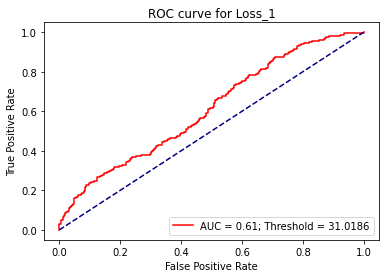

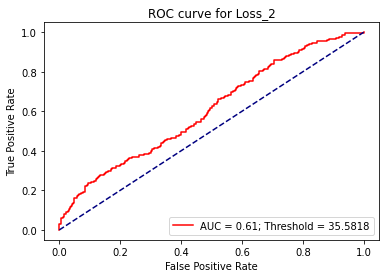

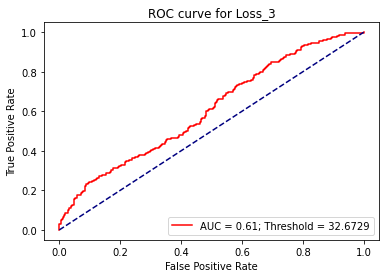

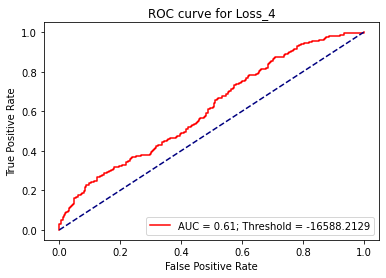

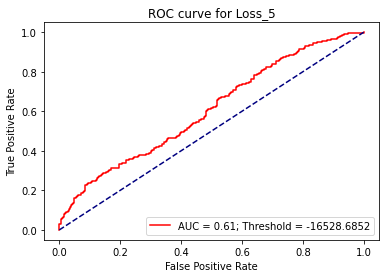

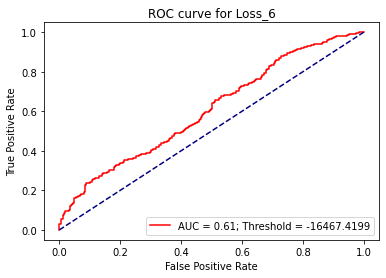

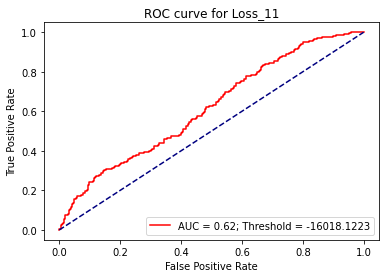

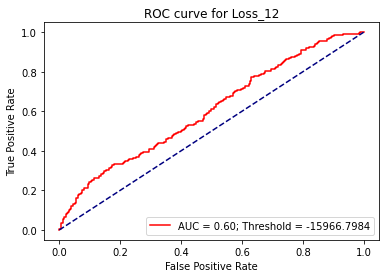

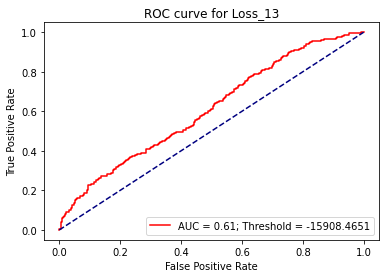

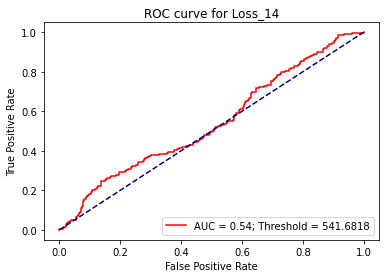

In [33]:
for i in [1, 2, 3, 4, 5, 6, 11, 12, 13, 14]:
    images = load_images(novel_all_path)
    dataset = setup_dataset(images.astype('float32'))
    losses = Loss_functions_dict[i](model, dataset)
    images = load_images(typical_test_path)
    dataset = setup_dataset(images.astype('float32'))
    losses = np.append(losses, Loss_functions_dict[i](model, dataset))
    y_true = np.zeros([len(losses),])
    y_true[0:len(novel_all_path)] = 1
    auc_dict[i], threshold_dict[i], _, _, _, threshold_avg_dict[i] = threshold_ROC(y_true, losses, 'Loss_'+str(i), plot=True)
    y_predicted_dict[i] = np.zeros([len(losses),])
    y_predicted_dict[i][np.where(losses > threshold_avg_dict[i])] = 1 

    table_of_counts = np.zeros([2,2])
    for j in range(len(losses),):
      if y_true[j] == 0:
        if y_predicted_dict[i][j] == 0:
          table_of_counts[0,0] += 1
        else: table_of_counts[0,1] += 1
      if y_true[j] == 1:
        if y_predicted_dict[i][j] == 0:
          table_of_counts[1,0] += 1
        else: table_of_counts[1,1] += 1

    true_positive = table_of_counts[1,1]
    false_positive = table_of_counts[0,1]
    true_negative = table_of_counts[0,0]
    false_negative = table_of_counts[1,0]

    accuracy = (true_positive+true_negative)/len(losses)
    avg_accuracy = np.mean([true_positive/(true_positive+false_negative),true_negative/(true_negative+false_positive)])

    table_of_counts_dict[i] = table_of_counts
    accuracy_dict[i] = accuracy
    avg_accuracy_dict[i] = avg_accuracy
    #np.save('/content/drive/My Drive/SPACE_DATA/ROC_curves/DS2_Threshold/Loss_'+str(i)+'.npy', losses)

0 1 2 0 1 2 

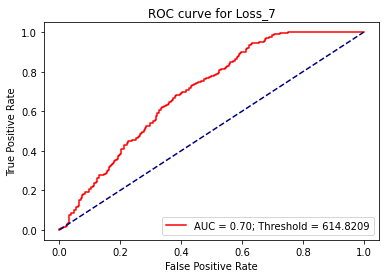

0 1 2 0 1 2 

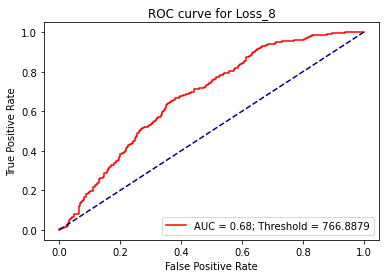

0 1 2 0 1 2 

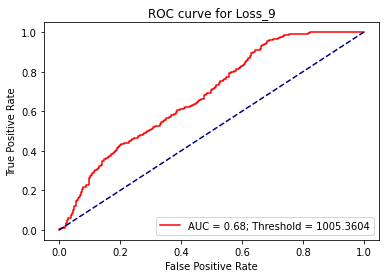

0 1 2 0 1 2 

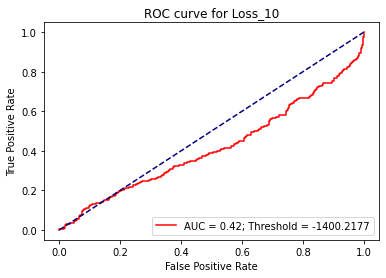

0 1 2 0 1 2 

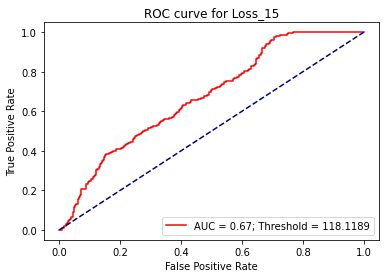

0 1 2 0 1 2 

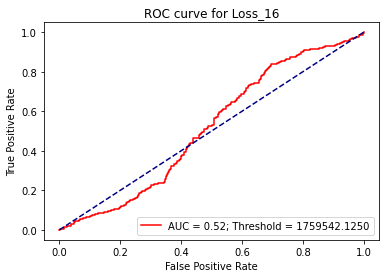

0 1 2 0 1 2 

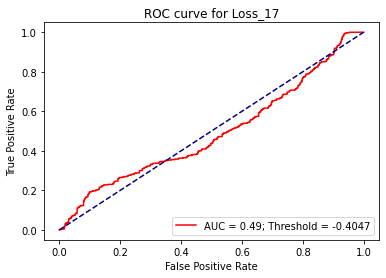

In [36]:
for i in [7,8,9,10,15,16,17]:
    start_time= time.time()
    temp = np.empty([3,len(novel_all_path)])
    images = load_images(novel_all_path)
    dataset1 = setup_dataset_no_shuffle(images.astype('float32'))
    for j in range(3):
      print(j, end=' ')
      images = load_images(typical_train_path[3100*j:3100*j+3100])
      dataset2 = setup_dataset_no_shuffle(images.astype('float32'))
      temp[j,:] = Loss_functions_dict[i](model, dataset2, dataset1)
    losses = np.min(temp, axis=0)

    temp = np.empty([3,len(typical_test_path)])
    images = load_images(typical_test_path)
    dataset1 = setup_dataset_no_shuffle(images.astype('float32'))
    for j in range(3):
      print(j, end=' ')
      images = load_images(typical_train_path[3100*j:3100*j+3100])
      dataset2 = setup_dataset_no_shuffle(images.astype('float32'))
      temp[j,:] = Loss_functions_dict[i](model, dataset2, dataset1)
    losses = np.append(losses, np.min(temp, axis=0))

    y_true = np.zeros([len(losses),])
    y_true[0:len(novel_all_path)] = 1
    auc_dict[i], threshold_dict[i], _, _, _, threshold_avg_dict[i] = threshold_ROC(y_true, losses, 'Loss_'+str(i), plot=True)
    y_predicted_dict[i] = np.zeros([len(losses),])
    y_predicted_dict[i][np.where(losses > threshold_avg_dict[i])] = 1 

    table_of_counts = np.zeros([2,2])
    for j in range(len(losses),):
      if y_true[j] == 0:
        if y_predicted_dict[i][j] == 0:
          table_of_counts[0,0] += 1
        else: table_of_counts[0,1] += 1
      if y_true[j] == 1:
        if y_predicted_dict[i][j] == 0:
          table_of_counts[1,0] += 1
        else: table_of_counts[1,1] += 1

    true_positive = table_of_counts[1,1]
    false_positive = table_of_counts[0,1]
    true_negative = table_of_counts[0,0]
    false_negative = table_of_counts[1,0]

    accuracy = (true_positive+true_negative)/len(losses)
    avg_accuracy = np.mean([true_positive/(true_positive+false_negative),true_negative/(true_negative+false_positive)])

    table_of_counts_dict[i] = table_of_counts
    accuracy_dict[i] = accuracy
    avg_accuracy_dict[i] = avg_accuracy

**Print the results for all losses computed**

In [37]:
print('THRESHOLD METHOD RESULTS')
result_table = np.empty([len(auc_dict),7])
index = ['_']*len(auc_dict)
j = 0
for i in np.sort(list(auc_dict.keys())):
  result_table[j,0] = "{0:.1f}".format(accuracy_dict[i]*100)
  result_table[j,1] = "{0:.1f}".format(avg_accuracy_dict[i]*100)
  result_table[j,2] = table_of_counts_dict[i][1,1].astype('int')
  result_table[j,3] = table_of_counts_dict[i][0,1].astype('int')
  result_table[j,4] = table_of_counts_dict[i][0,0].astype('int')
  result_table[j,5] = table_of_counts_dict[i][1,0].astype('int')
  result_table[j,6] = "{0:.1f}".format(auc_dict[i]*100)
  index[j] = 'Loss_'+str(i)
  j +=1
df = pd.DataFrame(result_table, index=index, columns = ['Accuracy', 'Avg_accuracy', 'True Pos.', 'False Pos.', 'True neg.', 'False Neg.', 'AUC',])
df.astype(str).replace('\.0', '', regex=True)

THRESHOLD METHOD RESULTS


,Accuracy,Avg_accuracy,True Pos.,False Pos.,True neg.,False Neg.,AUC
Loss_1,58.3,58.2,374,301,125,56,61.1
Loss_2,57.6,57.5,368,301,125,62,60.6
Loss_3,57.6,57.5,364,297,129,66,60.6
Loss_4,58.3,58.2,374,301,125,56,61.1
Loss_5,57,57.1,123,61,365,307,60.6
Loss_6,57.5,57.3,377,311,115,53,60.6
Loss_7,65.7,65.5,402,266,160,28,69.9
Loss_8,64.1,64.1,279,156,270,151,67.8
Loss_9,63.7,63.5,410,291,135,20,67.9
Loss_10,50.9,51.1,44,34,392,386,41.6


**Check accuracies for each individual class using loss 7**

In [0]:
threshold_dict_7 = dict([])
threshold_avg_dict_7 = dict([])
auc_dict_7 = dict([])
y_predicted_dict_7 = dict([])

table_of_counts_dict_7 = dict([])
accuracy_dict_7 = dict([])
avg_accuracy_dict_7 = dict([])

classes_dict = dict([(1,novel_bedrock_path),(2,novel_brokenrock_path),(3,novel_drillhole_path),(4,novel_drt_path),
                     (5,novel_dumppile_path),(6,novel_edgecases_path),(7,novel_float_path),(8,novel_meteorite_path),
                     (9,novel_other_path),(10,novel_scuff_path),(11,novel_veins_path)])

**Save on a google drive directory the novelty score for each class individually**

In [0]:
start_time= time.time()
temp_test = np.empty([3,len(typical_test_path)])
images = load_images(typical_test_path)
dataset1 = setup_dataset_no_shuffle(images.astype('float32'))
for j in range(3):
    print(j, end=' ')
    images = load_images(typical_train_path[3100*j:3100*j+3100])
    dataset2 = setup_dataset_no_shuffle(images.astype('float32'))
    temp_test[j,:] = Loss_functions_dict[7](model, dataset2, dataset1)

for i in range(1,12):
    temp = np.empty([3,len(classes_dict[i])])
    images = load_images(classes_dict[i])
    dataset1 = setup_dataset_no_shuffle(images.astype('float32'))
    for j in range(3):
      print(j, end=' ')
      images = load_images(typical_train_path[3100*j:3100*j+3100])
      dataset2 = setup_dataset_no_shuffle(images.astype('float32'))
      temp[j,:] = Loss_functions_dict[7](model, dataset2, dataset1)
    losses = np.min(temp, axis=0)

    losses = np.append(losses, np.min(temp_test, axis=0))

    y_true = np.zeros([len(losses),])
    y_true[0:len(classes_dict[i])] = 1
    auc_dict_7[i], threshold_dict_7[i], _, _, _, threshold_avg_dict_7[i] = threshold_ROC(y_true, losses, 'class_'+str(i), plot=True)
    y_predicted_dict_7[i] = np.zeros([len(losses),])
    y_predicted_dict_7[i][np.where(losses > threshold_avg_dict_7[i])] = 1 

    table_of_counts = np.zeros([2,2])
    for j in range(len(losses),):
      if y_true[j] == 0:
        if y_predicted_dict_7[i][j] == 0:
          table_of_counts[0,0] += 1
        else: table_of_counts[0,1] += 1
      if y_true[j] == 1:
        if y_predicted_dict_7[i][j] == 0:
          table_of_counts[1,0] += 1
        else: table_of_counts[1,1] += 1

    true_positive = table_of_counts[1,1]
    false_positive = table_of_counts[0,1]
    true_negative = table_of_counts[0,0]
    false_negative = table_of_counts[1,0]

    accuracy = (true_positive+true_negative)/len(losses)
    avg_accuracy = np.mean([true_positive/(true_positive+false_negative),true_negative/(true_negative+false_positive)])

    table_of_counts_dict_7[i] = table_of_counts
    accuracy_dict_7[i] = accuracy
    avg_accuracy_dict_7[i] = avg_accuracy
    print(time.time()-start_time)
    print(table_of_counts_dict_7[i])
    print(auc_dict_7[i])
    #np.save('/content/drive/My Drive/SPACE_DATA/ROC_curves/DS2_Threshold/Loss_7_classes/class_'+str(i)+'.npy', losses)

**Plot ROC curves and calculate results**

Load the data previosuly saved in the google drive

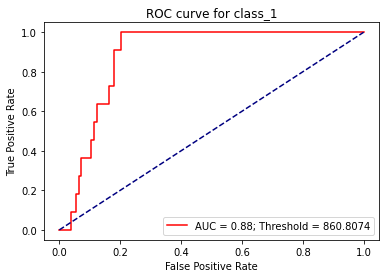

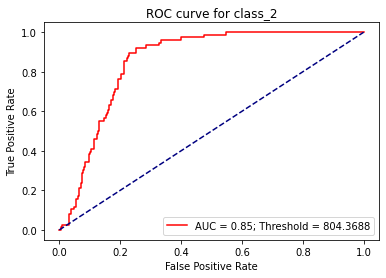

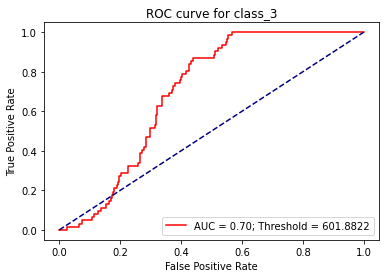

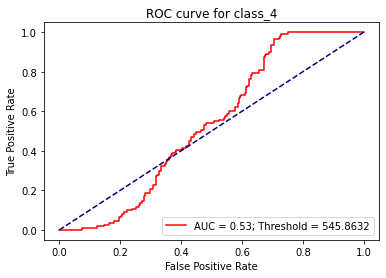

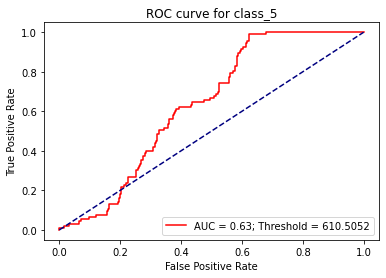

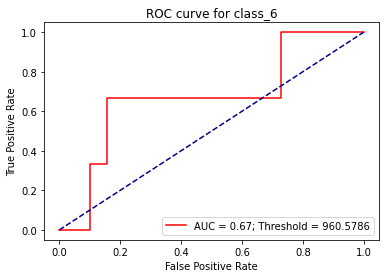

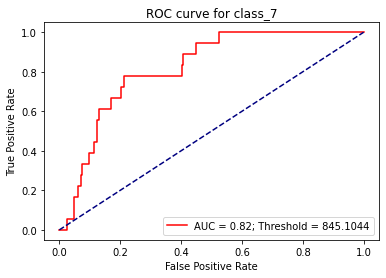

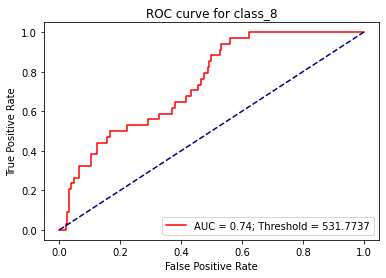

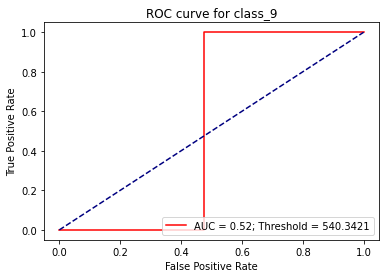

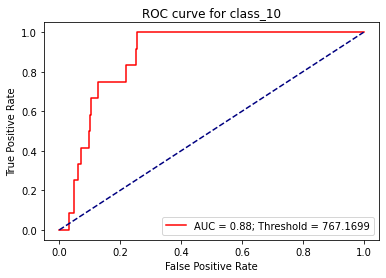

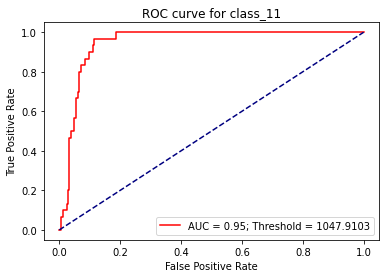

In [40]:
for i in range(1,12):
    losses = np.load('/content/drive/My Drive/SPACE_DATA/ROC_curves/DS2_Threshold/Loss_7_classes/class_'+str(i)+'.npy')
    y_true = np.zeros([len(losses),])
    y_true[0:len(classes_dict[i])] = 1
    auc_dict_7[i], threshold_dict_7[i], _, _, _, threshold_avg_dict_7[i] = threshold_ROC(y_true, losses, 'class_'+str(i), plot=True)
    y_predicted_dict_7[i] = np.zeros([len(losses),])
    y_predicted_dict_7[i][np.where(losses > threshold_avg_dict_7[i])] = 1 

    table_of_counts = np.zeros([2,2])
    for j in range(len(losses),):
      if y_true[j] == 0:
        if y_predicted_dict_7[i][j] == 0:
          table_of_counts[0,0] += 1
        else: table_of_counts[0,1] += 1
      if y_true[j] == 1:
        if y_predicted_dict_7[i][j] == 0:
          table_of_counts[1,0] += 1
        else: table_of_counts[1,1] += 1

    true_positive = table_of_counts[1,1]
    false_positive = table_of_counts[0,1]
    true_negative = table_of_counts[0,0]
    false_negative = table_of_counts[1,0]

    accuracy = (true_positive+true_negative)/len(losses)
    avg_accuracy = np.mean([true_positive/(true_positive+false_negative),true_negative/(true_negative+false_positive)])

    table_of_counts_dict_7[i] = table_of_counts
    accuracy_dict_7[i] = accuracy
    avg_accuracy_dict_7[i] = avg_accuracy

**Plot results for each class**

In [0]:
print('THRESHOLD METHOD RESULTS')
result_table = np.empty([len(auc_dict_7),7])
index = ['_']*len(auc_dict_7)
j = 0
for i in np.sort(list(auc_dict_7.keys())):
  result_table[j,0] = "{0:.1f}".format(accuracy_dict_7[i]*100)
  result_table[j,1] = "{0:.1f}".format(avg_accuracy_dict_7[i]*100)
  result_table[j,2] = table_of_counts_dict_7[i][1,1].astype('int')
  result_table[j,3] = table_of_counts_dict_7[i][0,1].astype('int')
  result_table[j,4] = table_of_counts_dict_7[i][0,0].astype('int')
  result_table[j,5] = table_of_counts_dict_7[i][1,0].astype('int')
  result_table[j,6] = "{0:.1f}".format(auc_dict_7[i]*100)
  index[j] = 'Class_'+str(i)
  j +=1
df = pd.DataFrame(result_table, index=index, columns = ['Accuracy', 'Avg_accuracy', 'True Pos.', 'False Pos.', 'True neg.', 'False Neg.', 'AUC',])
df.astype(str).replace('\.0', '', regex=True)


#classes_dict = dict([(1,novel_bedrock_path),(2,novel_brokenrock_path),(3,novel_drillhole_path),(4,novel_drt_path),
#                     (5,novel_dumppile_path),(6,novel_edgecases_path),(7,novel_float_path),(8,novel_meteorite_path),
#                     (9,novel_other_path),(10,novel_scuff_path),(11,novel_veins_path)])

THRESHOLD METHOD RESULTS


,Accuracy,Avg_accuracy,True Pos.,False Pos.,True neg.,False Neg.,AUC
Class_1,80.1,85.4,10,86,340,1,88.2
Class_2,77.1,82.7,69,108,318,7,85.4
Class_3,59.8,70.8,53,187,239,9,69.6
Class_4,41.7,62.6,109,311,115,2,53.3
Class_5,48.4,67.7,91,266,160,2,63.4
Class_6,83.9,58.8,1,67,359,2,67.1
Class_7,78.6,75.5,13,90,336,5,81.7
Class_8,47.6,69,32,239,187,2,74.3
Class_9,52.2,26.2,0,203,223,1,52.3
Class_10,74.9,83,11,109,317,1,88.2


#### Write the high-dimensional loss functions and test the semi-supervised model (with classifier 4)

**Write the losses (only non train-based ones)**

Reconstruction based losses will return an error-map of shape 64x64x6

Latent space based losses will return a error-vector of shape z_size

In [0]:
def Loss_1_img(model, x):
  losses_per_image = np.empty((0, 64, 64, 6))
  for images in x:
    z_mean, z_logvar = model.encode(images)
    x_logit = model.decode(z_mean)
    pixel_prob = tf.math.sigmoid(x_logit)
    pixel_squared = np.square(pixel_prob - images)
    losses_per_image = np.append(losses_per_image, pixel_squared, axis=0)
  return losses_per_image

def Loss_2_img(model, x):
  losses_per_image = np.empty((0, 64, 64, 6))
  for images in x:
    z_mean, z_logvar = model.encode(images)
    epsilon = tf.random.normal(shape=(30, 768))
    z = epsilon * tf.exp(z_logvar * 0.5) + z_mean
    x_logit = model.decode(z)
    pixel_prob = tf.math.sigmoid(x_logit)
    pixel_squared = np.square(pixel_prob - images)
    losses_per_image = np.append(losses_per_image, np.reshape(np.mean(pixel_squared, axis=0),(1, 64, 64, 6)), axis=0)
  return losses_per_image

def Loss_3_img(model, x):
  losses_per_image = np.empty((0, 64, 64, 6))
  for images in x:
    z_mean, z_logvar = model.encode(images)
    epsilon = tf.random.normal(shape=(30, 768))
    z = epsilon * tf.exp(z_logvar * 0.5) + z_mean
    x_logit = model.decode(z)
    pixel_prob = tf.math.sigmoid(x_logit)
    pixel_squared = np.square(pixel_prob - images)
    losses_per_image = np.append(losses_per_image, np.reshape(np.min(pixel_squared, axis=0),(1, 64, 64, 6)), axis=0)
  return losses_per_image

def Loss_4_img(model, x):
  losses_per_image = np.empty((0, 64, 64, 6))
  for images in x:
    z_mean, z_logvar = model.encode(images)
    x_logit = model.decode(z_mean)
    pixel_prob = tf.math.sigmoid(x_logit)
    logpx_z_pixels = tf.math.log(pixel_prob + 1e-10)*images + tf.math.log(1-pixel_prob + 1e-10)*(1-images)
    losses_per_image = np.append(losses_per_image, -logpx_z_pixels, axis=0)
  return losses_per_image

def Loss_5_img(model, x):
  losses_per_image = np.empty((0, 64, 64, 6))
  for images in x:
    z_mean, z_logvar = model.encode(images)
    epsilon = tf.random.normal(shape=(30, 768))
    z = epsilon * tf.exp(z_logvar * 0.5) + z_mean
    x_logit = model.decode(z)
    pixel_prob = tf.math.sigmoid(x_logit)
    logpx_z_pixels = tf.math.log(pixel_prob + 1e-10)*images + tf.math.log(1-pixel_prob + 1e-10)*(1-images)
    losses_per_image = np.append(losses_per_image, np.reshape(np.mean(-logpx_z_pixels, axis=0),(1, 64, 64, 6)), axis=0)
  return losses_per_image

def Loss_6_img(model, x):
  losses_per_image = np.empty((0, 64, 64, 6))
  for images in x:
    z_mean, z_logvar = model.encode(images)
    epsilon = tf.random.normal(shape=(30, 768))
    z = epsilon * tf.exp(z_logvar * 0.5) + z_mean
    x_logit = model.decode(z)
    pixel_prob = tf.math.sigmoid(x_logit)
    logpx_z_pixels = tf.math.log(pixel_prob + 1e-10)*images + tf.math.log(1-pixel_prob + 1e-10)*(1-images)
    losses_per_image = np.append(losses_per_image, np.reshape(np.min(-logpx_z_pixels, axis=0),(1, 64, 64, 6)), axis=0)
  return losses_per_image

def Loss_14_img(model, x):
  losses_per_image = np.empty((0, z_size))
  for images in x:
    z_mean, z_logvar = model.encode(images)
    KL_parameters = 0.5 * (1 + z_logvar - (z_mean ** 2.0) - tf.exp(z_logvar))
    #KL_vectors = tf.reduce_sum(KL_parameters, axis=1)
    losses_per_image = np.append(losses_per_image, KL_parameters, axis=0)
  return losses_per_image

Loss_functions_img_dict = dict([(1,Loss_1_img),(2,Loss_2_img),(3,Loss_3_img),(4,Loss_4_img),(5,Loss_5_img),(6,Loss_6_img),
                                (14,Loss_14_img)])

**Calculate and save loss 4 (or another reconstruction loss) error-maps, then create list of file path names for them**

In [0]:
os.mkdir('/content/error_map_typical_train/')
os.mkdir('/content/error_map_typical_test/')
os.mkdir('/content/error_map_novel_train/')
os.mkdir('/content/error_map_novel_test/')

In [45]:
loss_num = 4
time1 = time.time()

print('Progress of error_map_typical_train')
for i in range(len(typical_train_path)):
    if i%(len(typical_train_path)/100*5) == 0: print(str(int(i/len(typical_train_path)*100)) + '%,', end = ' ')
    images = load_images(typical_train_path[i])
    dataset = setup_dataset(images.astype('float32'))
    loss = Loss_functions_img_dict[loss_num](model, dataset)
    loss = np.squeeze(loss).astype('float32')
    np.save('/content/error_map_typical_train/'+str(i), loss)
print('100%')

print('\nProgress of error_map_typical_test')
for i in range(len(typical_test_path)):
    if i%42 == 0: print(str(i/420*100) + '%,', end = ' ')
    images = load_images(typical_test_path[i])
    dataset = setup_dataset(images.astype('float32'))
    loss = Loss_functions_img_dict[loss_num](model, dataset)
    loss = np.squeeze(loss).astype('float32')
    np.save('/content/error_map_typical_test/'+str(i), loss)
print('100%')

print('\nProgress of error_map_novel_train')
for i in range(len(novel_train_path)):
    if i%21 == 0: print(str(i/210*100) + '%,', end = ' ')
    images = load_images(novel_train_path[i])
    dataset = setup_dataset(images.astype('float32'))
    loss = Loss_functions_img_dict[loss_num](model, dataset)
    loss = np.squeeze(loss).astype('float32')
    np.save('/content/error_map_novel_train/'+str(i), loss)
print('100%')

print('\nProgress of error_map_novel_test')
for i in range(len(novel_test_path)):
    if i%21 == 0: print(str(i/210*100) + '%,', end = ' ')
    images = load_images(novel_test_path[i])
    dataset = setup_dataset(images.astype('float32'))
    loss = Loss_functions_img_dict[loss_num](model, dataset)
    loss = np.squeeze(loss).astype('float32')
    np.save('/content/error_map_novel_test/'+str(i), loss)
print('100%')

print(time.time()-time1)

Progress of error_map_typical_train
0%, 100%

Progress of error_map_typical_test
0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100.0%, 100%

Progress of error_map_novel_train
0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100.0%, 100%

Progress of error_map_novel_test
0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100.0%, 100%
153.5889024734497


In [46]:
errormap_typical_train_path = []
errormap_typical_test_path = []
errormap_novel_train_path = []
errormap_novel_test_path = []

for i in range(len(typical_train_path)):
  errormap_typical_train_path.append('/content/error_map_typical_train/'+str(i)+'.npy')

for i in range(len(typical_test_path)):
  errormap_typical_test_path.append('/content/error_map_typical_test/'+str(i)+'.npy')

for i in range(len(novel_train_path)):
  errormap_novel_train_path.append('/content/error_map_novel_train/'+str(i)+'.npy')

for i in range(len(novel_test_path)):
  errormap_novel_test_path.append('/content/error_map_novel_test/'+str(i)+'.npy')

print('losses_typical_img_train = ' + str(len(errormap_typical_train_path)))
print('losses_novel_img_train   = ' + str(len(errormap_typical_test_path)))
print('losses_typical_img_test  = ' + str(len(errormap_novel_train_path)))
print('losses_novel_img_test    = ' + str(len(errormap_novel_test_path)))

losses_typical_img_train = 9302
losses_novel_img_train   = 426
losses_typical_img_test  = 216
losses_novel_img_test    = 219


**Calculate and save loss 14 error-vectors, then create list of file path names for them**

In [0]:
os.mkdir('/content/latent_map_typical_train/')
os.mkdir('/content/latent_map_typical_test/')
os.mkdir('/content/latent_map_novel_train/')
os.mkdir('/content/latent_map_novel_test/')

In [49]:
loss_num = 14
time1 = time.time()

print('Progress of latent_map_typical_train')
for i in range(len(typical_train_path)):
    if i%(len(typical_train_path)/100*5) == 0: print(str(int(i/len(typical_train_path)*100)) + '%,', end = ' ')
    images = load_images(typical_train_path[i])
    dataset = setup_dataset(images.astype('float32'))
    loss = Loss_functions_img_dict[loss_num](model, dataset)
    loss = np.squeeze(loss).astype('float32')
    np.save('/content/latent_map_typical_train/'+str(i), loss)
print('100%')

print('\nProgress of latent_map_typical_test')
for i in range(len(typical_test_path)):
    if i%43 == 0: print(str(i/430*100) + '%,', end = ' ')
    images = load_images(typical_test_path[i])
    dataset = setup_dataset(images.astype('float32'))
    loss = Loss_functions_img_dict[loss_num](model, dataset)
    loss = np.squeeze(loss).astype('float32')
    np.save('/content/latent_map_typical_test/'+str(i), loss)
print('100%')

print('\nProgress of latent_map_novel_train')
for i in range(len(novel_train_path)):
    if i%22 == 0: print(str(i/220*100) + '%,', end = ' ')
    images = load_images(novel_train_path[i])
    dataset = setup_dataset(images.astype('float32'))
    loss = Loss_functions_img_dict[loss_num](model, dataset)
    loss = np.squeeze(loss).astype('float32')
    np.save('/content/latent_map_novel_train/'+str(i), loss)
print('100%')

print('\nProgress of latent_map_novel_test')
for i in range(len(novel_test_path)):
    if i%22 == 0: print(str(i/220*100) + '%,', end = ' ')
    images = load_images(novel_test_path[i])
    dataset = setup_dataset(images.astype('float32'))
    loss = Loss_functions_img_dict[loss_num](model, dataset)
    loss = np.squeeze(loss).astype('float32')
    np.save('/content/latent_map_novel_test/'+str(i), loss)
print('100%')

print(time.time()-time1)

Progress of latent_map_typical_train
0%, 100%

Progress of latent_map_typical_test
0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100%

Progress of latent_map_novel_train
0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100%

Progress of latent_map_novel_test
0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100%
95.58526349067688


In [50]:
latent_typical_train_path = []
latent_typical_test_path = []
latent_novel_train_path = []
latent_novel_test_path = []

for i in range(len(typical_train_path)):
  latent_typical_train_path.append('/content/latent_map_typical_train/'+str(i)+'.npy')

for i in range(len(typical_test_path)):
  latent_typical_test_path.append('/content/latent_map_typical_test/'+str(i)+'.npy')

for i in range(len(novel_train_path)):
  latent_novel_train_path.append('/content/latent_map_novel_train/'+str(i)+'.npy')

for i in range(len(novel_test_path)):
  latent_novel_test_path.append('/content/latent_map_novel_test/'+str(i)+'.npy')

print('losses_typical_img_train = ' + str(len(latent_typical_train_path)))
print('losses_typical_img_test   = ' + str(len(latent_typical_test_path)))
print('losses_novel_img_train  = ' + str(len(latent_novel_train_path)))
print('losses_novel_img_test    = ' + str(len(latent_novel_test_path)))

losses_typical_img_train = 9302
losses_typical_img_test   = 426
losses_novel_img_train  = 216
losses_novel_img_test    = 219


**Create classifier model (classifier 4)**

The error-vector is appended to the error-map after the latter goes though some convolutional layers

In [0]:
input1 = tf.keras.layers.Input(shape = (64, 64, 6))
x1 = tf.keras.layers.Conv2D(32, (5,5), padding='SAME', activation='relu', name='x1')(input1)
x2 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, name='x2')(x1)
x3 = tf.keras.layers.Conv2D(64, (5,5), padding='SAME', activation='relu', name='x3')(x2)
x4 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, name='x4')(x3)
x5 = tf.keras.layers.Flatten(name='x5')(x4)

input2 = tf.keras.layers.Input(shape=(768,))

added = tf.keras.layers.concatenate([x5, input2])
added2 = tf.keras.layers.Dense(512, activation='relu', name='added2')(added)
out = tf.keras.layers.Dense(1, name='out')(added2)

classifier = tf.keras.models.Model(inputs=[input1, input2], outputs=out)

**Define optimizer and loss metrics**

The learnign rate of the Adam optimizer is a hyperparameter

In [0]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001) #0.0001
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

**Define loss function of Classifier 4**

weighted cross entropy with weight of 2.5 (1000/400) to deal with class imbalance (reduced significantly by ROS)

In [0]:
def calculate_loss(model, x1, x2, y):
    logits = model([x1, x2])
    labels = y

    weight = 1000/400
      
    loss = tf.nn.weighted_cross_entropy_with_logits(labels = labels, logits = logits, pos_weight = weight)
    loss = tf.reduce_mean(loss)

    return loss

**Define a function for a train and test step**

train_step = updated the model using the optimizer and the gradients of the loss function; updates the train_loss metric

test_step = calculates the loss function of the test image; updates the test_loss metric

train_only_dataset = trains the the whole train-dataset for a certain number of epochs, reuturns the loss

In [0]:
def train_step(model, x1, x2, y, optimizer):
    with tf.GradientTape() as tape:
        loss = calculate_loss(model, x1, x2, y)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        train_loss(loss)

def test_step(model, x1, x2, y, optimizer):
    loss = calculate_loss(model, x1, x2)
    test_loss(loss)

def train_only_dataset(model, train_dataset1, train_dataset2, epochs):  
  for epoch in range(epochs):
    for data1, data2 in zip(train_dataset1, train_dataset2):
      train_x1 = data1[0]
      train_y = data1[1]
      train_x2 = data2[0]
      train_step(model, train_x1, train_x2, train_y, optimizer)
      
    loss = train_loss.result()
     
  train_loss.reset_states()
  return loss

In [0]:
def setup_dataset(x, y):
  images = x

  batch_size = 100
  dataset = tf.data.Dataset.from_tensor_slices((images, y)).shuffle(len(images)).batch(batch_size)
  return dataset

def setup_dataset_no_shuffle(x, y):
  images = x

  batch_size = 100
  dataset = tf.data.Dataset.from_tensor_slices((images, y)).batch(batch_size)
  return dataset

**Train the classifier**

In [0]:
classifier = tf.keras.models.Model(inputs=[input1, input2], outputs=out)

In [0]:
N_novel_images_test = len(novel_test_path)
N_novel_images_train = len(novel_train_path)

199.8---> 0.18017316


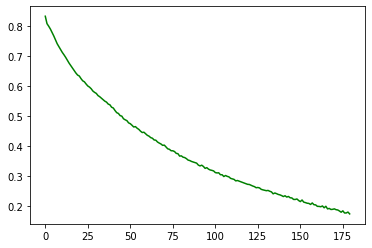

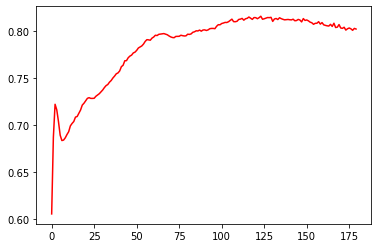

TRAINING TIME = 4405.901614665985



In [86]:
start_time = time.time()

losses = []

losses_test = []
test_data1 = np.append(errormap_novel_test_path, errormap_typical_test_path)
test_data2 = np.append(latent_novel_test_path, latent_typical_test_path)
test_labels = np.zeros([len(test_data1), 1]).astype('float32')
test_labels[0:N_novel_images_test, 0] = 1

epochs = 200

for j in range(epochs):
  errormap_typical_train_path, latent_typical_train_path = shuffle(errormap_typical_train_path, latent_typical_train_path)

  for i in range(9):
    errormap_novel_train_path, latent_novel_train_path,  = shuffle(errormap_novel_train_path, latent_novel_train_path)
    train_data1 = np.append(errormap_novel_train_path[0:400], errormap_typical_train_path[i*1000:(i+1)*1000])
    train_data2 = np.append(latent_novel_train_path[0:400], latent_typical_train_path[i*1000:(i+1)*1000])
    train_labels = np.zeros([len(train_data1), 1]).astype('float32')
    train_labels[0:N_novel_images_train, 0] = 1
    dataset1 = setup_dataset_no_shuffle(load_images(train_data1), train_labels)
    dataset2 = setup_dataset_no_shuffle(load_images(train_data2), train_labels)
    loss = train_only_dataset(classifier, dataset1, dataset2, 1)
    losses = np.append(losses, loss.numpy())

    logits = classifier([load_images(test_data1), load_images(test_data2)])
    logits = np.array(logits[:,0])
    a, _, _, _, l, _ = threshold_ROC(test_labels, logits, 'NN classifier', plot=False)
    losses_test = np.append(losses_test, l)

    if len(losses)%10 == 0 and i>1:
      clear_output()
      print(str(j) + '.' + str(i) + '---> ' + str(loss.numpy()))

      a = np.reshape(losses, [-1,10])
      a = np.mean(a, axis=1)
      plt.plot(range(len(a)), a, color='green')
      plt.show()

      b = np.reshape(losses_test, [-1,10])
      b = np.mean(b, axis=1)
      plt.plot(range(len(b)), b, color='red')
      plt.show()

print('TRAINING TIME = {}\n'.format(time.time()-start_time))

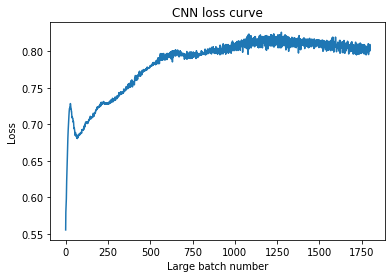

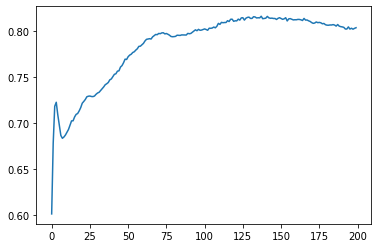

0.8261302977683453
0.8021898514373915


In [87]:
l = losses_test

plt.plot(range(len(l)), l)
plt.title('CNN loss curve')
plt.xlabel('Large batch number')
plt.ylabel('Loss')
#plt.savefig('/content/ROC_losses_graph/loss_curve_12')
plt.show()


a = np.reshape(l, [-1,9])
a = np.mean(a, axis=1)
plt.plot(range(len(a)), a)
plt.show()

print(max(l))
print(l[-1])

**Classify the test images**

In [0]:
logits = classifier([load_images(test_data1), load_images(test_data2)])
logits = np.array(logits[:,0])
prob = tf.sigmoid(logits)
prob = np.array(prob)

**Calculate final results**

In [0]:
def threshold_ROC(y_true, y_score, title, plot=True):
  fpr, tpr, threshold = roc_curve(y_true, y_score)
  roc_auc = auc(fpr, tpr)
  optimal_idx = np.argmin(np.sqrt(np.square(1-tpr) + np.square(fpr)))
  optimal_threshold = threshold[optimal_idx]

  optimal_accuracy_idx = np.argmax(tpr*32+((1-fpr)*100))
  optimal_accuracy = (tpr[optimal_accuracy_idx]*32+((1-fpr[optimal_accuracy_idx])*100))/132
  optimal_accuracy_threshold = threshold[optimal_accuracy_idx]

  optimal_avgaccuracy_idx = np.argmax(tpr + 1 - fpr)
  optimal_avgaccuracy = (tpr[optimal_avgaccuracy_idx]+1-fpr[optimal_avgaccuracy_idx])/2
  optimal_avgaccuracy_threshold = threshold[optimal_avgaccuracy_idx]

  if plot:
    plot = plt.figure()
    plt.plot(fpr, tpr, color='red', label='AUC = %0.2f; Threshold = %0.4f' % (roc_auc,optimal_threshold))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for ' + title)
    plt.legend(loc="lower right")
    plt.show()
  return roc_auc, optimal_threshold, optimal_accuracy, optimal_accuracy_threshold, optimal_avgaccuracy, optimal_avgaccuracy_threshold

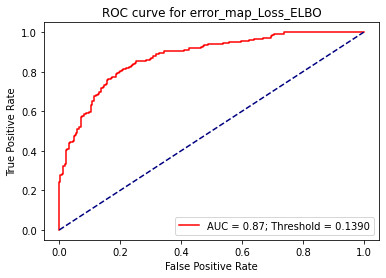

,Accuracy,Avg_accuracy,True Pos.,False Pos.,True Neg.,False Neg.,AUC
0,80.5,80.2,174,81,345,45,87.5


In [94]:
loss_num = 'ELBO'

auc_value, threshold_value, _, threshold_max_value, _, threshold_avg_value = threshold_ROC(test_labels, prob, 'error_map_Loss_'+str(loss_num), plot=True)
y_predicted = np.zeros([len(test_labels),])
y_predicted[np.where(prob >= threshold_avg_value)] = 1 

table_of_counts = np.zeros([2,2])
for j in range(len(test_labels),):
  if test_labels[j] == 0:
    if y_predicted[j] == 0:
      table_of_counts[0,0] += 1
    else: table_of_counts[0,1] += 1
  if test_labels[j] == 1:
    if y_predicted[j] == 0:
      table_of_counts[1,0] += 1
    else: table_of_counts[1,1] += 1

true_positive = table_of_counts[1,1]
false_positive = table_of_counts[0,1]
true_negative = table_of_counts[0,0]
false_negative = table_of_counts[1,0]

accuracy = (true_positive+true_negative)/len(test_labels)
avg_accuracy = np.mean([true_positive/(true_positive+false_negative),true_negative/(true_negative+false_positive)])

result_table = np.empty([1,7])
index = ['_']*1
result_table[0,0] = "{0:.1f}".format(accuracy*100)
result_table[0,1] = "{0:.1f}".format(avg_accuracy*100)
result_table[0,2] = table_of_counts[1,1].astype('int')
result_table[0,3] = table_of_counts[0,1].astype('int')
result_table[0,4] = table_of_counts[0,0].astype('int')
result_table[0,5] = table_of_counts[1,0].astype('int')
result_table[0,6] = "{0:.1f}".format(auc_value*100)
index = 'Loss_1'
df = pd.DataFrame(result_table, columns = ['Accuracy', 'Avg_accuracy', 'True Pos.', 'False Pos.', 'True Neg.', 'False Neg.','AUC'])
df.astype(str).replace('\.0', '', regex=True)

**Check accuracies for each individual class**

In [0]:
threshold_dict_classes = dict([])
threshold_avg_dict_classes = dict([])
auc_dict_classes = dict([])
y_predicted_dict_classes = dict([])

table_of_counts_dict_classes = dict([])
accuracy_dict_classes = dict([])
avg_accuracy_dict_classes = dict([])

classes_dict = dict([(1,novel_bedrock_path),(2,novel_brokenrock_path),(3,novel_drillhole_path),(4,novel_drt_path),
                     (5,novel_dumppile_path),(6,novel_edgecases_path),(7,novel_float_path),(8,novel_meteorite_path),
                     (9,novel_other_path),(10,novel_scuff_path),(11,novel_veins_path)])

In [0]:
def idx_of_class(novel_test_path, class_to_pick):
    classes = check_classes(novel_test_path)
    indeces_of_class = []
    indeces_of_train = np.arange(len(latent_novel_test_path),len(latent_typical_test_path)+len(latent_novel_test_path)).astype('int')
    for i in range(len(classes)):
        if classes[i][0] == class_to_pick: indeces_of_class.append(i)
    indeces = np.concatenate((indeces_of_class, indeces_of_train), axis=0)
    return indeces.astype('int')

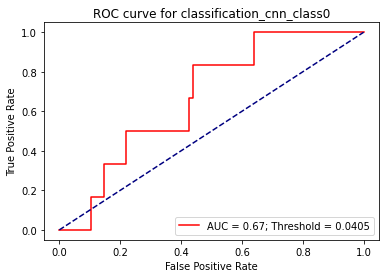

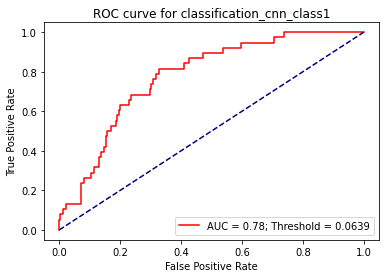

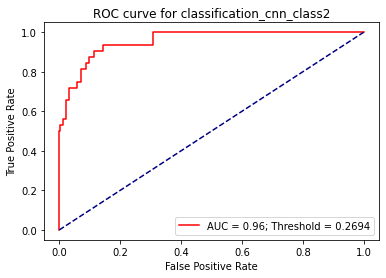

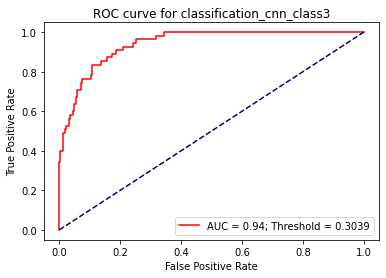

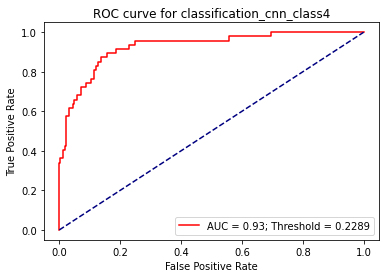

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


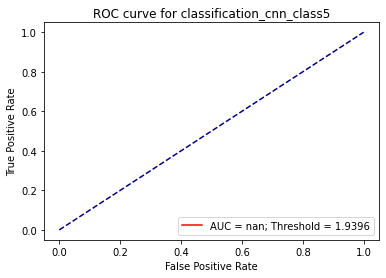

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


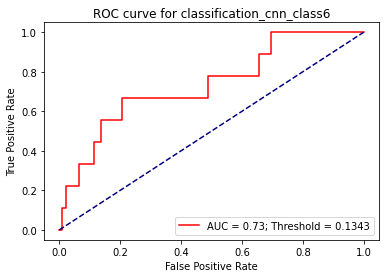

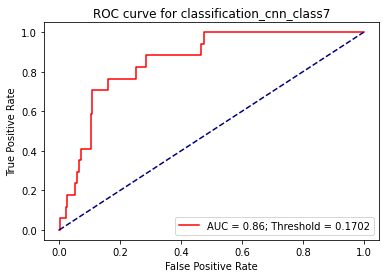

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


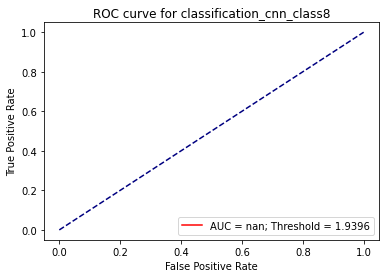

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


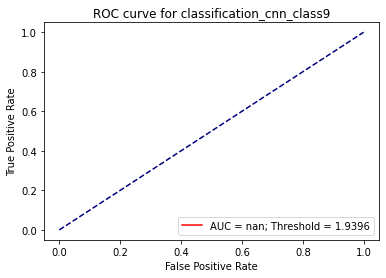

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


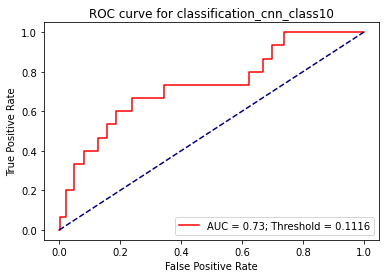

In [101]:
loss_num = 'ELBO'

for i in range(11):
    indeces = idx_of_class(novel_test_path, i)
    auc_dict_classes[i], threshold_dict_classes[i], _, threshold_max_value, _, threshold_avg_dict_classes[i] = threshold_ROC(test_labels[indeces], prob[indeces], 'classification_cnn_class'+str(i), plot=True)
    y_predicted_dict_classes[i] = np.zeros([len(test_labels[indeces]),])
    y_predicted_dict_classes[i][np.where(prob[indeces] >= threshold_avg_dict_classes[i])] = 1 

    table_of_counts_dict_classes[i] = np.zeros([2,2])
    for j in range(len(test_labels[indeces]),):
        if test_labels[indeces][j] == 0:
            if y_predicted_dict_classes[i][j] == 0:
                table_of_counts_dict_classes[i][0,0] += 1
            else: table_of_counts_dict_classes[i][0,1] += 1
        if test_labels[indeces][j] == 1:
            if y_predicted_dict_classes[i][j] == 0:
                table_of_counts_dict_classes[i][1,0] += 1
            else: table_of_counts_dict_classes[i][1,1] += 1

    true_positive = table_of_counts_dict_classes[i][1,1]
    false_positive = table_of_counts_dict_classes[i][0,1]
    true_negative = table_of_counts_dict_classes[i][0,0]
    false_negative = table_of_counts_dict_classes[i][1,0]

    accuracy_dict_classes[i] = (true_positive+true_negative)/len(test_labels[indeces])
    avg_accuracy_dict_classes[i] = np.mean([true_positive/(true_positive+false_negative),true_negative/(true_negative+false_positive)])

In [102]:
print('THRESHOLD METHOD RESULTS')
result_table = np.empty([len(auc_dict_classes),7])
index = ['_']*len(auc_dict_classes)
j = 0
for i in np.sort(list(auc_dict_classes.keys())):
  result_table[j,0] = "{0:.1f}".format(accuracy_dict_classes[i]*100)
  result_table[j,1] = "{0:.1f}".format(avg_accuracy_dict_classes[i]*100)
  result_table[j,2] = table_of_counts_dict_classes[i][1,1].astype('int')
  result_table[j,3] = table_of_counts_dict_classes[i][0,1].astype('int')
  result_table[j,4] = table_of_counts_dict_classes[i][0,0].astype('int')
  result_table[j,5] = table_of_counts_dict_classes[i][1,0].astype('int')
  result_table[j,6] = "{0:.1f}".format(auc_dict_classes[i]*100)
  index[j] = 'Class_'+str(i+1)
  j +=1
df = pd.DataFrame(result_table, index=index, columns = ['Accuracy', 'Avg_accuracy', 'True Pos.', 'False Pos.', 'True neg.', 'False Neg.', 'AUC',])
df.astype(str).replace('\.0', '', regex=True)

#classes_dict = dict([(1,novel_bedrock_path),(2,novel_brokenrock_path),(3,novel_drillhole_path),(4,novel_drt_path),
#                     (5,novel_dumppile_path),(6,novel_edgecases_path),(7,novel_float_path),(8,novel_meteorite_path),
#                     (9,novel_other_path),(10,novel_scuff_path),(11,novel_veins_path)])

THRESHOLD METHOD RESULTS


,Accuracy,Avg_accuracy,True Pos.,False Pos.,True neg.,False Neg.,AUC
Class_1,56.5,69.7,5,187,239,1,67
Class_2,68.5,74.5,31,139,287,7,77.7
Class_3,86.2,89.7,30,61,365,2,95.6
Class_4,88.6,86.4,46,46,380,9,94.1
Class_5,84.8,86.8,42,67,359,5,92.7
Class_6,100,nan,0,0,426,0,nan
Class_7,79.1,73,6,88,338,3,73.3
Class_8,83.7,80.3,13,68,358,4,85.5
Class_9,100,nan,0,0,426,0,nan
Class_10,100,nan,0,0,426,0,nan
